# Project 4 01- Train EDA and modelling

__Table of Contents:__
- [Data Cleaning](##data-cleaning)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Pre Processing](##Data-Cleaning)
- [Modelling](##Data-Cleaning)
- [Model Evaluation](##Data-Cleaning)


In [1]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#import geopandas as gpd
#from geopandas import GeoSeries, GeoDataFrame
#from geopy.distance import geodesic

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

sns.set_style('ticks')

pd.set_option('display.max_columns', None)

%matplotlib inline

# # installing less common packages (uncomment if you do not have these installed)
# !pip install geopy
# !pip install geopandas

In [2]:
train = pd.read_csv('./data/train.csv', parse_dates=['Date'])
test = pd.read_csv('./data/test.csv', parse_dates=['Date'])
spray = pd.read_csv('./data/spray.csv', parse_dates=['Date'])
weather = pd.read_csv('./data/weather.csv', parse_dates=['Date'])

In [3]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    10506 non-null  datetime64[ns]
 1   Address                 10506 non-null  object        
 2   Species                 10506 non-null  object        
 3   Block                   10506 non-null  int64         
 4   Street                  10506 non-null  object        
 5   Trap                    10506 non-null  object        
 6   AddressNumberAndStreet  10506 non-null  object        
 7   Latitude                10506 non-null  float64       
 8   Longitude               10506 non-null  float64       
 9   AddressAccuracy         10506 non-null  int64         
 10  NumMosquitos            10506 non-null  int64         
 11  WnvPresent              10506 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), ob

In [5]:
train.Species.unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [6]:
test.Species.unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'UNSPECIFIED CULEX', 'CULEX ERRATICUS'], dtype=object)

In [7]:
test['Species'].value_counts()

CULEX PIPIENS/RESTUANS    15359
CULEX RESTUANS            14670
CULEX PIPIENS             14521
CULEX SALINARIUS          14355
CULEX TERRITANS           14351
CULEX TARSALIS            14347
CULEX ERRATICUS           14345
UNSPECIFIED CULEX         14345
Name: Species, dtype: int64

In [8]:
train['Species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [9]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


### Train data EDA

#### Distribution of target variable against mosquito species

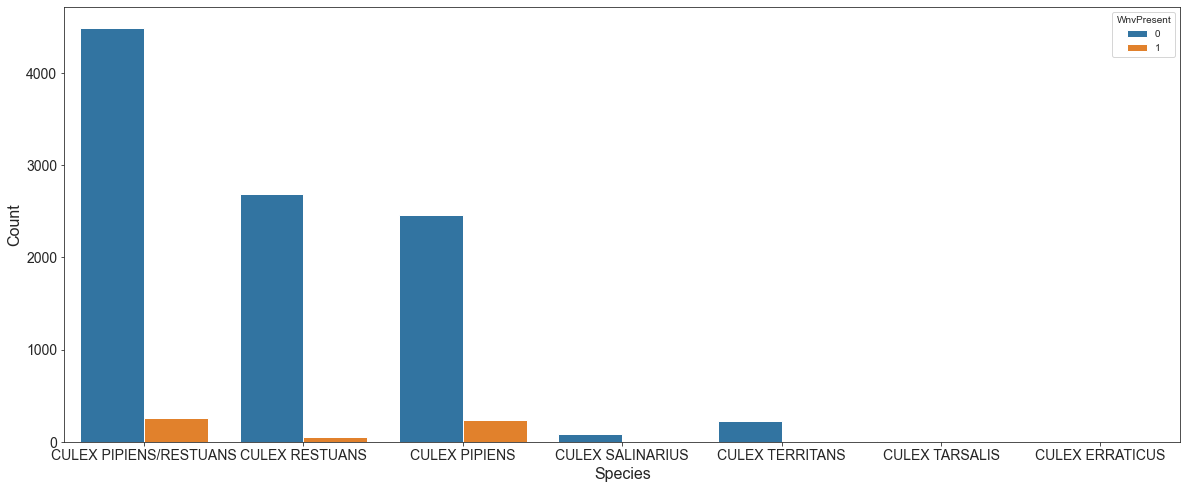

In [10]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(x='Species',data=train,hue='WnvPresent')


plt.xlabel("Species", size = 16)
plt.ylabel("Count", size = 16)
plt.xticks(size=14)
plt.yticks(size=14);

From the barchart above, the most common found mosquito species are the Culex Pipien/ Restuans, Culex Restuans and Culex Pipiens which have much larger total trap counts making up >96% of the sampled species compared to the other species, with the Culex Erraticus having the lowest count of just 1. 

WNV is also only detected in these 3 species from the samples collected. 

In [11]:
species_wnv = train[['Species', 'NumMosquitos', 'WnvPresent']].groupby(by='Species').sum()
species_wnv

,NumMosquitos,WnvPresent
Species,,
CULEX ERRATICUS,7,0
CULEX PIPIENS,44671,240
CULEX PIPIENS/RESTUANS,66268,262
CULEX RESTUANS,23431,49
CULEX SALINARIUS,145,0
CULEX TARSALIS,7,0
CULEX TERRITANS,510,0


#### Create Year, Month and Week columns

In [12]:
train['Year'] = train['Date'].apply(lambda x:x.year)
train['Month'] = train['Date'].apply(lambda x:x.month)
train['WeekofYear'] = train['Date'].apply(lambda x:x.weekofyear)

#### Mosquito numbers and WNV presence across different months

In [13]:
month_wnv = train[['Month','NumMosquitos', 'WnvPresent']].groupby(by='Month').sum()
month_wnv

,NumMosquitos,WnvPresent
Month,,
5,230,0
6,16578,1
7,37248,46
8,58036,377
9,21029,125
10,1918,2


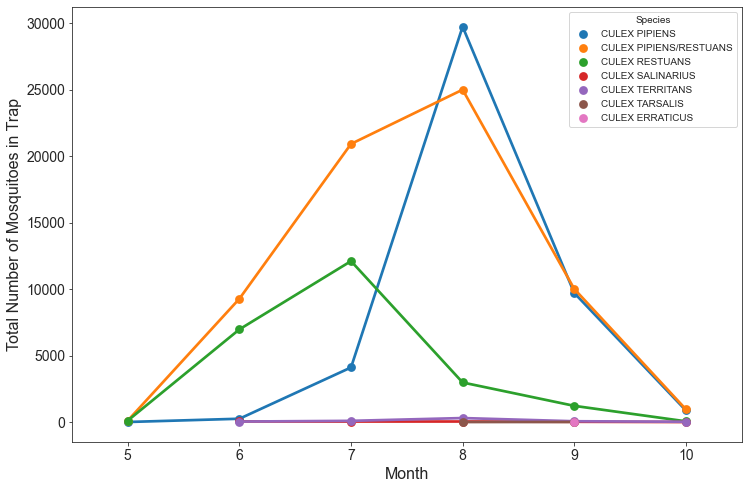

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
#sns.pointplot(x='Month', y="NumMosquitos", hue='Species', data=train[train['Species'].isin(['CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS'])].groupby(['Month', 'Species'], as_index=False)['NumMosquitos'].mean(),)
sns.pointplot(x='Month', y="NumMosquitos", hue='Species', data=train.groupby(['Month','Species'], as_index=False)['NumMosquitos'].sum(),)

plt.ylabel('Number of Mosquitoes in Trap')

plt.xlabel("Month", size = 16)
plt.ylabel("Total Number of Mosquitoes in Trap", size = 16)
plt.xticks(size=14)
plt.yticks(size=14);

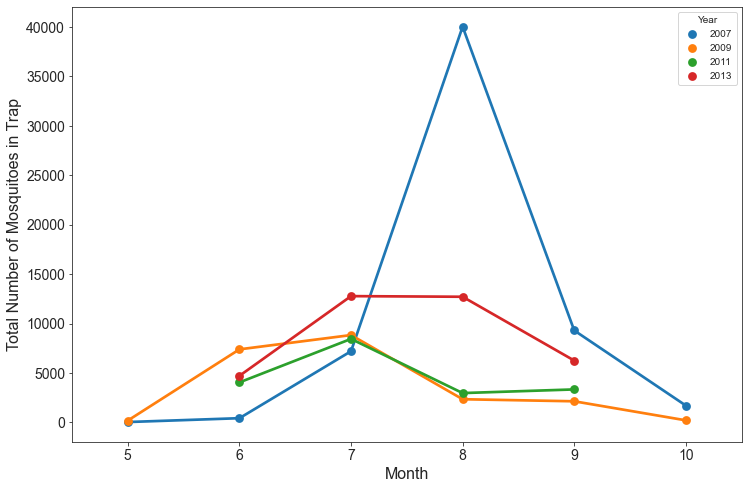

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
#sns.pointplot(x='Month', y="NumMosquitos", hue='Species', data=train[train['Species'].isin(['CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS'])].groupby(['Month', 'Species'], as_index=False)['NumMosquitos'].mean(),)
sns.pointplot(x='Month', y="NumMosquitos", hue='Year', data=train.groupby(['Year', 'Month'], as_index=False)['NumMosquitos'].sum(),)

plt.ylabel('Average Number of Mosquitoes in Trap')

plt.xlabel("Month", size = 16)
plt.ylabel("Total Number of Mosquitoes in Trap", size = 16)
plt.xticks(size=14)
plt.yticks(size=14);

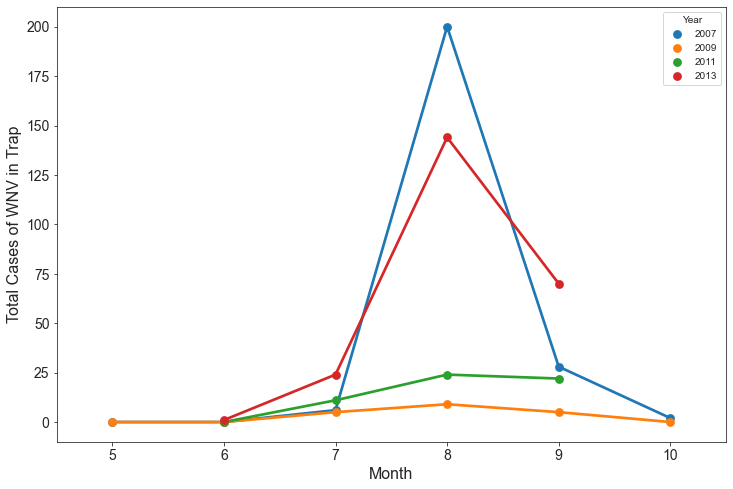

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
sns.pointplot(x='Month', y="WnvPresent", hue="Year", data=train.groupby(['Year', 'Month'], as_index=False)['WnvPresent'].sum(),)

plt.xlabel('Month', size=16)
plt.ylabel('Total Cases of WNV in Trap', size=16)
plt.xticks(size=14)
plt.yticks(size=14);

From the line charts above, the mosquito population and WNV case counts are at their peak in August,and varies across years with an apparent spike in 2007.

From the point plots, we can also observe there is seasonal variation in the mosquito species, with the Culex Restuan population peaking earlier in July compared to the Culex Pipien population peaking later in August. According to literature, this observation could be traced to the  Culex. Restuans preferring cool, early spring temperatures, while Culex Pipiens prefer the warmer, mid- to late-summer months.(https://pubmed.ncbi.nlm.nih.gov/31310655/).

#### WNV Epicentre

In [17]:
street_wnv = train[['AddressNumberAndStreet','NumMosquitos', 'WnvPresent']].groupby(by='AddressNumberAndStreet').sum().sort_values('WnvPresent', ascending=False)
street_wnv

,NumMosquitos,WnvPresent
AddressNumberAndStreet,,
"1000 W OHARE AIRPORT, Chicago, IL",15386,66
"1200 S DOTY AVE, Chicago, IL",21668,41
"4100 N OAK PARK AVE, Chicago, IL",3710,18
"1000 S STONY ISLAND AVE, Chicago, IL",9936,16
"4600 N MILWAUKEE AVE, Chicago, IL",1346,14
...,...,...
"2500 S THROOP, Chicago, IL",33,0
"6500 S RACINE AVE, Chicago, IL",17,0
"2200 W PERSHING RD, Chicago, IL",23,0


## Data Cleaning

### Weather Data

In [18]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   object        
 5   Depart       2944 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2944 non-null   object        
 8   Heat         2944 non-null   object        
 9   Cool         2944 non-null   object        
 10  Sunrise      2944 non-null   object        
 11  Sunset       2944 non-null   object        
 12  CodeSum      2944 non-null   object        
 13  Depth        2944 non-null   object        
 14  Water1       2944 non-null   object        
 15  SnowFall     2944 non-null   object        
 16  Precip

#### Impute missing values

In [19]:
# Check for missing values for weather data. Replace placeholders with np.nan
def clean_nan(x): 
    if str(x) in ['','T',' T', '  T','M', '-']:
        return np.nan
    else:
        return x
weather = weather.applymap(clean_nan)

In [20]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2933 non-null   object        
 5   Depart       1472 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2940 non-null   object        
 8   Heat         2933 non-null   object        
 9   Cool         2933 non-null   object        
 10  Sunrise      1472 non-null   object        
 11  Sunset       1472 non-null   object        
 12  CodeSum      2944 non-null   object        
 13  Depth        1472 non-null   object        
 14  Water1       0 non-null      float64       
 15  SnowFall     1460 non-null   object        
 16  Precip

In [21]:
percent_missing = weather.isnull().sum() * 100 / len(weather)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
Station,0.000000
Date,0.000000
Tmax,0.000000
Tmin,0.000000
Tavg,0.373641
Depart,50.000000
DewPoint,0.000000
WetBulb,0.135870
Heat,0.373641
Cool,0.373641


In [22]:
# 50% missing values for some variables due to data not normally collected from Station 2
weather[['Station','Date','Depart','Sunrise','Sunset','Depth','SnowFall']]

,Station,Date,Depart,Sunrise,Sunset,Depth,SnowFall
0,1,2007-05-01,14,0448,1849,0,0.0
1,2,2007-05-01,NaN,NaN,NaN,NaN,NaN
2,1,2007-05-02,-3,0447,1850,0,0.0
3,2,2007-05-02,NaN,NaN,NaN,NaN,NaN
4,1,2007-05-03,2,0446,1851,0,0.0
...,...,...,...,...,...,...,...
2939,2,2014-10-29,NaN,NaN,NaN,NaN,NaN
2940,1,2014-10-30,-4,0622,1649,0,0.0
2941,2,2014-10-30,NaN,NaN,NaN,NaN,NaN
2942,1,2014-10-31,-6,0623,1647,0,0.1


In [23]:
# Impute missing value for Tavg, which is actually average of Tmax and Tmin
weather.Tavg = (weather.Tmax + weather.Tmin)/2

# Drop 'Water1' column with 100% missing values
weather = weather.drop(labels=['Water1'], axis=1)

In [24]:
weather['SnowFall'].value_counts()

0.0    1459
0.1       1
Name: SnowFall, dtype: int64

In [25]:
# Drop 'SnowFall' column as almost all 'SnowFall' values are 0 or null which offer no addtional information
weather = weather.drop(labels=['SnowFall'], axis=1)

In [26]:
weather['Depth'].value_counts()

0    1472
Name: Depth, dtype: int64

In [27]:
# Drop 'Depth' column as all values are 0 which offer no addtional information
weather = weather.drop(labels=['Depth'], axis=1)

#### Create Humidity column 

Our hypothesis is that mosquitoes tend to thrive in humid environment. 

In [28]:
# Convert temperature to celsius
Tavg_C = ((weather['Tavg'] - 32) * 5 / 9)
DewPoint_C = ((weather['DewPoint'] - 32) * 5 / 9)
# Calculate vapour pressure and actual pressure
VapPress_Sat = np.exp((17.625 * Tavg_C) / (Tavg_C + 243.04))
VapPress_Act = np.exp((17.625 * DewPoint_C) / (DewPoint_C + 243.04))
# Calculate relative humidity
Rel_Humidity = (VapPress_Act / VapPress_Sat) * 100

weather['Rel_Humidity'] = Rel_Humidity

#### Create Night hours column 

Our hypothesis is that mosquitoes tend to come out at night hence mosquitoes activity could be higher when night hours are longer.

In [29]:
weather['Sunrise'].unique()

array(['0448', nan, '0447', '0446', '0444', '0443', '0442', '0441',
       '0439', '0438', '0437', '0436', '0435', '0434', '0433', '0432',
       '0431', '0430', '0429', '0428', '0427', '0426', '0425', '0424',
       '0423', '0422', '0421', '0420', '0419', '0418', '0417', '0416',
       '0440', '0445', '0449', '0450', '0451', '0452', '0453', '0454',
       '0455', '0456', '0457', '0458', '0459', '0500', '0501', '0502',
       '0503', '0504', '0505', '0506', '0508', '0509', '0510', '0511',
       '0512', '0513', '0514', '0515', '0516', '0517', '0518', '0519',
       '0520', '0521', '0522', '0523', '0524', '0525', '0526', '0527',
       '0528', '0529', '0530', '0531', '0532', '0533', '0535', '0536',
       '0537', '0538', '0539', '0540', '0541', '0542', '0543', '0544',
       '0545', '0546', '0547', '0548', '0549', '0550', '0552', '0553',
       '0554', '0555', '0556', '0557', '0558', '0559', '0600', '0602',
       '0603', '0604', '0605', '0606', '0607', '0608', '0610', '0611',
       '0

In [30]:
weather['Sunset'].unique()

array(['1849', nan, '1850', '1851', '1852', '1853', '1855', '1856',
       '1857', '1858', '1859', '1860', '1901', '1902', '1903', '1904',
       '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912',
       '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920',
       '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928',
       '1929', '1930', '1931', '1900', '1854', '1848', '1846', '1845',
       '1843', '1842', '1840', '1839', '1837', '1835', '1834', '1832',
       '1831', '1829', '1827', '1826', '1824', '1822', '1821', '1819',
       '1817', '1815', '1814', '1812', '1810', '1809', '1807', '1805',
       '1803', '1760', '1758', '1756', '1755', '1753', '1751', '1749',
       '1748', '1746', '1744', '1742', '1741', '1739', '1737', '1735',
       '1734', '1732', '1730', '1729', '1727', '1725', '1724', '1722',
       '1720', '1719', '1717', '1715', '1714', '1712', '1711', '1709',
       '1707', '1706', '1704', '1703', '1701', '1660', '1658', '1657',
       '1

In [31]:
# Cleaning up wrong formatted of Sunset time, e.g. 1760 hrs should be changed to 1800 hours

weather_sun = weather.loc[weather['Station'] == 1].copy()

weather_sun['Sunset'] = weather_sun['Sunset'].map(lambda x : (str(int(x[0:2]) + 1) + '00') if x[2:4] == '60' else x)

weather_sun['Sunrise_Time'] = weather_sun['Sunrise'].map(lambda x : dt.datetime.strptime(x, '%H%M'))
weather_sun['Sunset_Time'] = weather_sun['Sunset'].map(lambda x : dt.datetime.strptime(x, '%H%M'))
weather_sun['Night_Hours'] = (1440 - (weather_sun['Sunset_Time'] - weather_sun['Sunrise_Time']).map(lambda x : x.seconds / 60))/60

In [32]:
# Merge back to main weather dataframe
weather = weather.merge(weather_sun[['Date', 'Night_Hours']], on = 'Date')
weather = weather.drop(labels=['Sunrise','Sunset'], axis=1)

In [33]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Rel_Humidity,Night_Hours
0,1,2007-05-01,83,50,66.5,14,51,56,0,2,,0.00,29.10,29.82,1.7,27,9.2,57.422798,9.983333
1,2,2007-05-01,84,52,68.0,NaN,51,57,0,3,,0.00,29.18,29.82,2.7,25,9.6,54.526426,9.983333
2,1,2007-05-02,59,42,50.5,-3,42,47,14,0,BR,0.00,29.38,30.09,13.0,4,13.4,72.526813,9.950000
3,2,2007-05-02,60,43,51.5,NaN,42,47,13,0,BR HZ,0.00,29.44,30.08,13.3,2,13.4,69.892062,9.950000
4,1,2007-05-03,66,46,56.0,2,40,48,9,0,,0.00,29.39,30.12,11.7,7,11.9,54.874919,9.916667


#### Convert numeric columns to numeric data types

In [34]:
num_cols = ['Station', 'Tmax', 'Tmin', 'Tavg', 
            'Depart', 'DewPoint','WetBulb', 'Heat',
            'Cool', 'PrecipTotal']

weather[num_cols] = weather[num_cols].applymap(pd.to_numeric)

In [35]:
weather.SeaLevel = weather.SeaLevel.astype(float)
weather.AvgSpeed = weather.AvgSpeed.astype(float)
weather.StnPressure = weather.StnPressure.astype(float)

#### Create columns for significant weather events 

In [36]:
code_sum_list = []

def get_code_sum_elems(code_sum_string):
    code_sum_list 
    code_sum_list.extend(code_sum_string.split())
    return True

for i in weather['CodeSum']:
    get_code_sum_elems(i.strip())

code_sum_set = set(code_sum_list)
code_sum_set

{'BCFG',
 'BR',
 'DZ',
 'FG',
 'FG+',
 'FU',
 'GR',
 'HZ',
 'MIFG',
 'RA',
 'SN',
 'SQ',
 'TS',
 'TSRA',
 'VCFG',
 'VCTS'}

In [37]:
# Create a column for each CodeSum element
for i in code_sum_set:
    weather[i] = np.nan
    
for index, row in weather.iterrows():
    codesum_list = row['CodeSum'].split() 
    for j in codesum_list:
        #set corresponding column to 1
        if j in code_sum_set:
            weather.loc[index,j]=1

In [38]:
weather.drop(labels='CodeSum',axis=1,inplace=True)

In [39]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Rel_Humidity,Night_Hours,VCFG,GR,TSRA,RA,FG,TS,BCFG,SQ,DZ,VCTS,HZ,MIFG,SN,BR,FG+,FU
0,1,2007-05-01,83,50,66.5,14.0,51,56.0,0.0,2.0,0.0,29.10,29.82,1.7,27,9.2,57.422798,9.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2007-05-01,84,52,68.0,NaN,51,57.0,0.0,3.0,0.0,29.18,29.82,2.7,25,9.6,54.526426,9.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2007-05-02,59,42,50.5,-3.0,42,47.0,14.0,0.0,0.0,29.38,30.09,13.0,4,13.4,72.526813,9.950000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,2,2007-05-02,60,43,51.5,NaN,42,47.0,13.0,0.0,0.0,29.44,30.08,13.3,2,13.4,69.892062,9.950000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,0.0,29.39,30.12,11.7,7,11.9,54.874919,9.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Create Year, Month and Week columns

In [40]:
weather['Year'] = weather['Date'].apply(lambda x:x.year)
weather['Month'] = weather['Date'].apply(lambda x:x.month)
weather['WeekofYear'] = weather['Date'].apply(lambda x:x.weekofyear)

#### Compare differences between weather data collected by Station 1 and Station 2

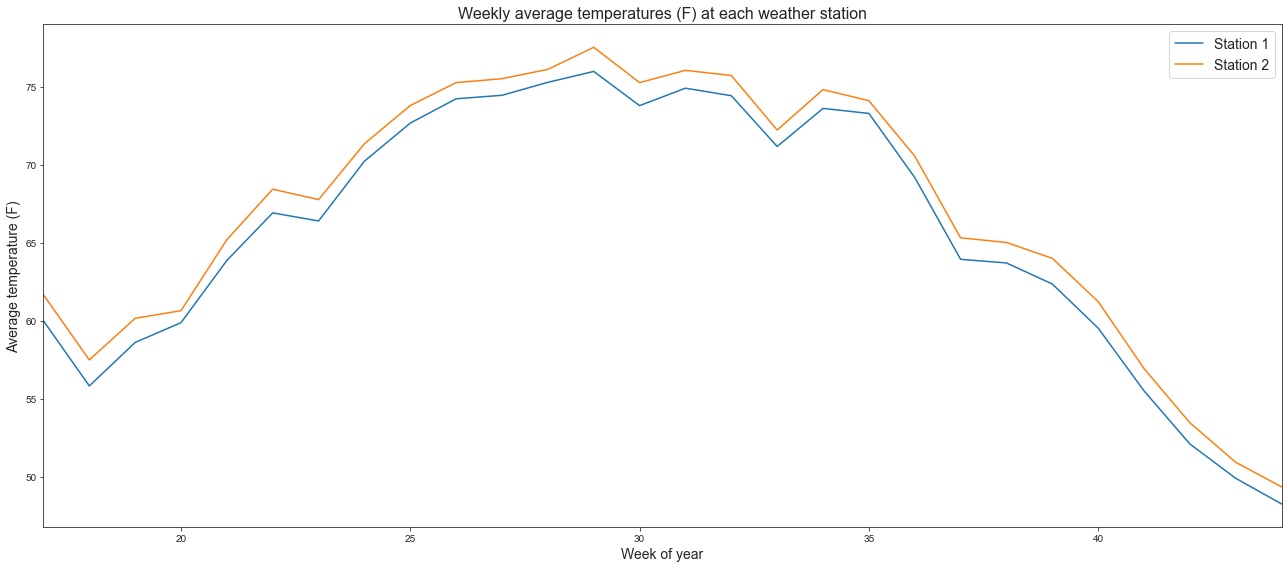

In [41]:
# plot weekly temperature by station
plt.figure(figsize=(18,8))
sns.lineplot(x = 'WeekofYear',y = 'Tavg', data = weather[weather.Station==1], ci = None, label = "Station 1")
sns.lineplot(x = 'WeekofYear',y = 'Tavg', data = weather[weather.Station==2], ci = None, label = "Station 2")
plt.legend(fontsize = 14)
plt.title('Weekly average temperatures (F) at each weather station', fontsize=16)
plt.xlabel('Week of year',fontsize=14)
plt.ylabel('Average temperature (F)',fontsize=14)
plt.xlim(weather.WeekofYear.min(), weather.WeekofYear.max())
plt.tight_layout()

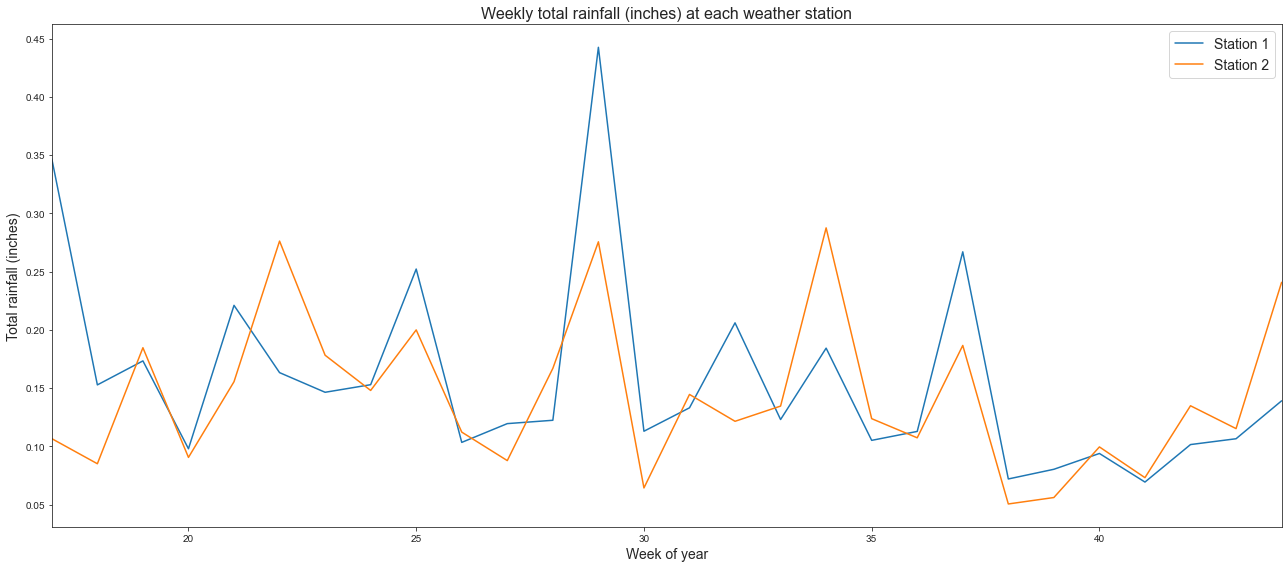

In [42]:
# plot weekly rainfall by station
plt.figure(figsize=(18,8))
sns.lineplot(x = 'WeekofYear',y = 'PrecipTotal',data = weather[weather.Station==1],ci = None,label = "Station 1")
sns.lineplot(x = 'WeekofYear',y = 'PrecipTotal',data = weather[weather.Station==2],ci = None,label = "Station 2")
plt.legend(fontsize = 14)
plt.title('Weekly total rainfall (inches) at each weather station', fontsize=16)
plt.xlabel('Week of year',fontsize=14)
plt.ylabel('Total rainfall (inches)',fontsize=14)
plt.xlim(weather.WeekofYear.min(), weather.WeekofYear.max())
plt.tight_layout()

From background, temperature and rainfall are likely to have bigger effect on mosquito activity. Based on the weekly temperature and rainfall line charts above, the trending seems to be similar between the two weather stations, with some slight differences due to location and perhaps instrument calibration. A decision was taken to combine the weather data of the 2 weather stations to derive the mean weather for a particular day. 

#### Combine data from the 2 weather stations

In [43]:
weather_combined = weather.groupby('Date').mean()
weather_combined.drop(['Station', 'Year','Month','WeekofYear'],axis=1,inplace=True)
weather_combined.reset_index(inplace=True)

In [44]:
# adding year/month/week columns back as they were previously affected by the groupby function and removed
weather_combined['year'] = weather_combined['Date'].apply(lambda x:x.year)
weather_combined['month'] = weather_combined['Date'].apply(lambda x:x.month)
weather_combined['weekofyear'] = weather_combined['Date'].apply(lambda x:x.weekofyear)


In [45]:
weather_combined.head()

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Rel_Humidity,Night_Hours,VCFG,GR,TSRA,RA,FG,TS,BCFG,SQ,DZ,VCTS,HZ,MIFG,SN,BR,FG+,FU,year,month,weekofyear
0,2007-05-01,83.5,51.0,67.25,14.0,51.0,56.5,0.0,2.5,0.0,29.140,29.820,2.20,26.0,9.40,55.974612,9.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,5,18
1,2007-05-02,59.5,42.5,51.00,-3.0,42.0,47.0,13.5,0.0,0.0,29.410,30.085,13.15,3.0,13.40,71.209437,9.950000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2007,5,18
2,2007-05-03,66.5,47.0,56.75,2.0,40.0,49.0,8.0,0.0,0.0,29.425,30.120,12.30,6.5,12.55,53.429105,9.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2007,5,18
3,2007-05-04,72.0,50.0,61.00,4.0,41.5,50.0,7.0,0.0,0.0,29.335,30.045,10.25,7.5,10.60,48.932050,9.866667,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,5,18
4,2007-05-05,66.0,53.5,59.75,5.0,38.5,49.5,5.0,0.0,NaN,29.430,30.095,11.45,7.0,11.75,45.237980,9.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,5,18


In [46]:
weather_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1472 non-null   datetime64[ns]
 1   Tmax          1472 non-null   float64       
 2   Tmin          1472 non-null   float64       
 3   Tavg          1472 non-null   float64       
 4   Depart        1472 non-null   float64       
 5   DewPoint      1472 non-null   float64       
 6   WetBulb       1472 non-null   float64       
 7   Heat          1472 non-null   float64       
 8   Cool          1472 non-null   float64       
 9   PrecipTotal   1408 non-null   float64       
 10  StnPressure   1471 non-null   float64       
 11  SeaLevel      1472 non-null   float64       
 12  ResultSpeed   1472 non-null   float64       
 13  ResultDir     1472 non-null   float64       
 14  AvgSpeed      1472 non-null   float64       
 15  Rel_Humidity  1472 non-null   float64 

In [47]:
weather_combined['PrecipTotal'].value_counts()

0.000    804
0.010     56
0.005     28
0.020     25
0.040     19
        ... 
1.050      1
2.290      1
1.510      1
0.790      1
0.560      1
Name: PrecipTotal, Length: 214, dtype: int64

In [48]:
# Fill null values with '0' for PrecipTotal as majority of the values are '0'
weather_combined['PrecipTotal'].fillna(0, inplace = True) 

In [49]:
weather_combined['StnPressure'].describe()

count    1471.000000
mean       29.284426
std         0.155539
min        28.590000
25%        29.195000
50%        29.290000
75%        29.380000
max        29.825000
Name: StnPressure, dtype: float64

In [50]:
# Fill null values with mean value for StnPressure as there is little variation in the station pressure values. 
weather_combined['StnPressure'].fillna(29.284, inplace = True) 

In [51]:
# Fill null values with 0 for weather event columns
weather_combined.replace(np.nan,0, inplace=True)

In [52]:
weather_combined.head()

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Rel_Humidity,Night_Hours,VCFG,GR,TSRA,RA,FG,TS,BCFG,SQ,DZ,VCTS,HZ,MIFG,SN,BR,FG+,FU,year,month,weekofyear
0,2007-05-01,83.5,51.0,67.25,14.0,51.0,56.5,0.0,2.5,0.0,29.140,29.820,2.20,26.0,9.40,55.974612,9.983333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007,5,18
1,2007-05-02,59.5,42.5,51.00,-3.0,42.0,47.0,13.5,0.0,0.0,29.410,30.085,13.15,3.0,13.40,71.209437,9.950000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2007,5,18
2,2007-05-03,66.5,47.0,56.75,2.0,40.0,49.0,8.0,0.0,0.0,29.425,30.120,12.30,6.5,12.55,53.429105,9.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2007,5,18
3,2007-05-04,72.0,50.0,61.00,4.0,41.5,50.0,7.0,0.0,0.0,29.335,30.045,10.25,7.5,10.60,48.932050,9.866667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007,5,18
4,2007-05-05,66.0,53.5,59.75,5.0,38.5,49.5,5.0,0.0,0.0,29.430,30.095,11.45,7.0,11.75,45.237980,9.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007,5,18


## Exploratory Data Analysis

### Weather EDA

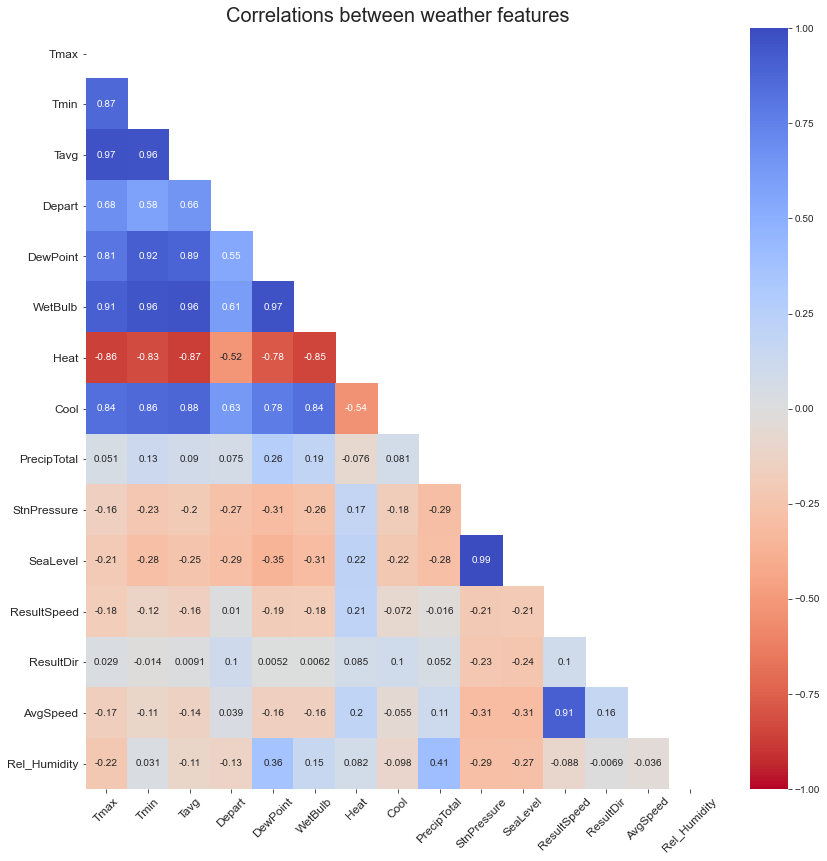

In [53]:
weather_corr = weather_combined[['Tmax','Tmin','Tavg','Depart','DewPoint','WetBulb','Heat','Cool','PrecipTotal',\
                                'StnPressure','SeaLevel','ResultSpeed','ResultDir','AvgSpeed','Rel_Humidity']].corr() 

mask = np.zeros_like(weather_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(14,14))

ax = sns.heatmap(weather_corr, vmin=-1, vmax=1, mask=mask, annot = True, cmap = 'coolwarm_r')

ax.set_title('Correlations between weather features', size = 20)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)

plt.show()

#### Collinear features

From the heatmap above, there are some features that are highly correlated with each other. Examples include:

- Sea Level and Station Pressure. Will keep Station Pressure since it corresponds to atmospheric pressure. 
- Wet Bulb, Dew Point, Average, Minimum and Maximum Temperature. Will keep Average Temperature to reduce features.
- Resultant and Average Speed. Will keep Average Speed instead. 

In [54]:
# Drop weather variables with multi-collinearity; coefficient >= 0.9
weather_combined = weather_combined.drop(['SeaLevel', 'Tmax', 'Tmin', 'WetBulb', 'DewPoint', 'ResultSpeed'], axis = 1) 

Text(0.5, 1.0, 'Distribution of Night Duration')

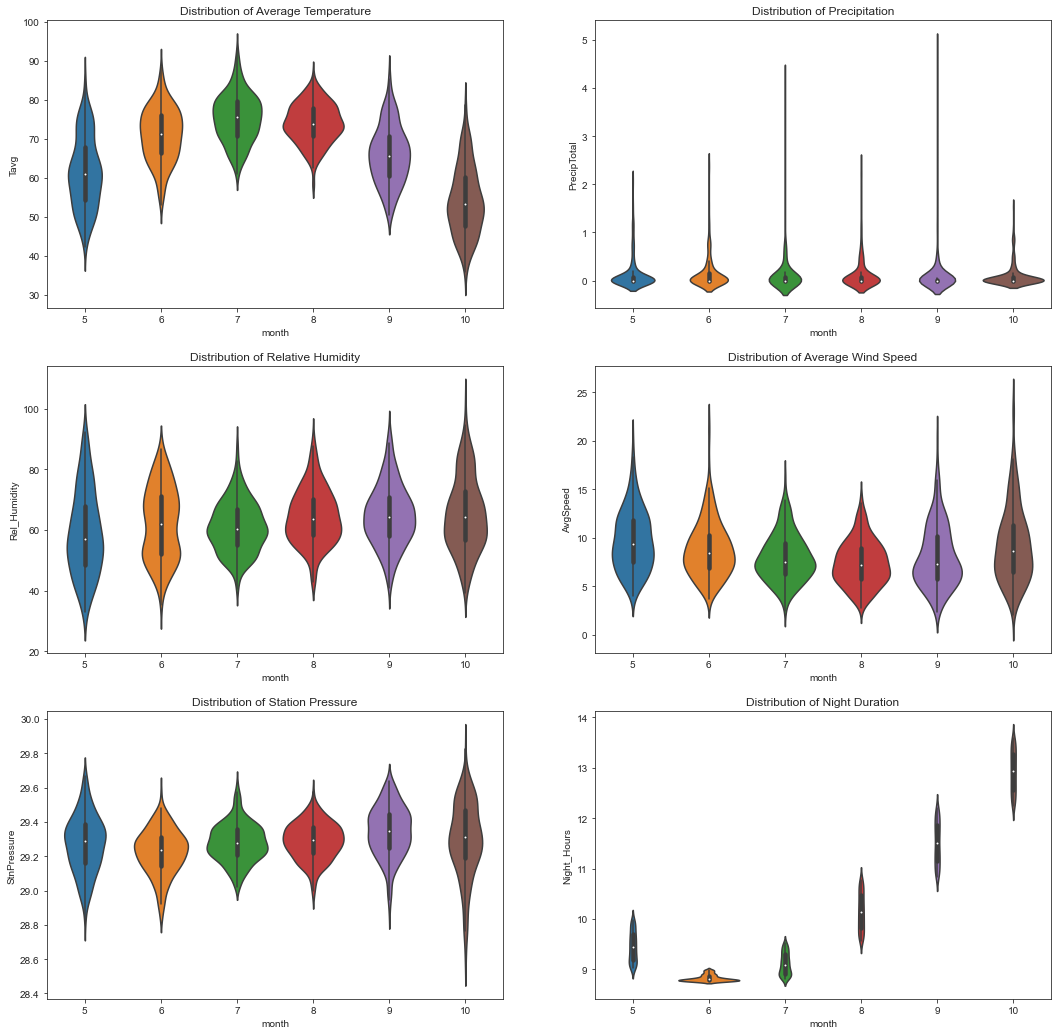

In [55]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 18))

sns.violinplot(x='month', y='Tavg',ax=ax[0][0], data=weather_combined)
ax[0][0].set_title('Distribution of Average Temperature', fontsize=12)

sns.violinplot(x='month', y='PrecipTotal', ax=ax[0][1], data=weather_combined)
ax[0][1].set_title('Distribution of Precipitation', fontsize=12)

sns.violinplot(x='month', y='Rel_Humidity',ax=ax[1][0], data=weather_combined)
ax[1][0].set_title('Distribution of Relative Humidity', fontsize=12)

sns.violinplot(x='month', y='AvgSpeed',ax=ax[1][1],data=weather_combined)
ax[1][1].set_title('Distribution of Average Wind Speed', fontsize=12)

sns.violinplot(x='month', y='StnPressure',ax=ax[2][0], data=weather_combined)
ax[2][0].set_title('Distribution of Station Pressure', fontsize=12)

sns.violinplot(x='month', y='Night_Hours', ax=ax[2][1], data=weather_combined)
ax[2][1].set_title('Distribution of Night Duration', fontsize=12)


According to literature, mosquito population density vary strongly with temperature, with hot and dry conditions favouring their growth and West Nile virus than cold and wet conditions. This is due to the temperature dependence of the development rates of eggs, larvae and pupae, as well as survival rates of female mosquitoes. 

In lower temperatures between 20 degree Celsius (68 degree Fahrenheit) and 24 degree Celsius (75.2 degree Fahrenheit), it was found that embryonation, lavae and pupal stages took longer and the female mosquitoes lived longer, as compared to higher temperature of 28 degree Celsius (84.4 degree Fahrenheit). 
https://pdfs.semanticscholar.org/1e02/57f23ef925e437a5995c1720b3a2ab518cac.pdf

Precipitation also has an influence on mosquito population, as mosquitoes breed in various types of stagnant water. Research had found high rainfall occurring several weeks before a capture event was positively correlated with the mosquito abundance. Precipitation may also negatively impact the mosquito growth as the immature stages may get washed away by heavy rainfall. 
https://parasitesandvectors.biomedcentral.com/articles/10.1186/1756-3305-6-129

In terms of mosquito activity, they are generally active from dusk to dawn, and become inactive in windy conditions since they are weak flying insects. 

From the violin plots above based on records between 2007 May and 2014 October, it can be seen that temperature and precipitation tend to peak in July which could go as high as above 90 F and 4 inches respectively, which suggest a lagging effect on the mosquito population and WNV peak seen in August. 

The wind speed is also observed to be lower in July and August during the mosquito peak season. The night hours are relatively longer in August (peak season) than July. Hence they might also be good predictors to detect presence of WNV. 

In [56]:
weather_combined.head()

,Date,Tavg,Depart,Heat,Cool,PrecipTotal,StnPressure,ResultDir,AvgSpeed,Rel_Humidity,Night_Hours,VCFG,GR,TSRA,RA,FG,TS,BCFG,SQ,DZ,VCTS,HZ,MIFG,SN,BR,FG+,FU,year,month,weekofyear
0,2007-05-01,67.25,14.0,0.0,2.5,0.0,29.140,26.0,9.40,55.974612,9.983333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007,5,18
1,2007-05-02,51.00,-3.0,13.5,0.0,0.0,29.410,3.0,13.40,71.209437,9.950000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2007,5,18
2,2007-05-03,56.75,2.0,8.0,0.0,0.0,29.425,6.5,12.55,53.429105,9.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2007,5,18
3,2007-05-04,61.00,4.0,7.0,0.0,0.0,29.335,7.5,10.60,48.932050,9.866667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007,5,18
4,2007-05-05,59.75,5.0,5.0,0.0,0.0,29.430,7.0,11.75,45.237980,9.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007,5,18


In [57]:
weather_combined.set_index('Date', inplace=True)

In [58]:
# create rolling averages for selected weather features on temperature and precipitation which have an effect on mosquito embryonation process
weather_combined["Tavg_roll_7"] = weather_combined.rolling(window=7,min_periods=1).mean()["Tavg"]
weather_combined["Tavg_roll_14"] = weather_combined.rolling(window=14,min_periods=1).mean()["Tavg"]
weather_combined["Depart_roll_7"] = weather_combined.rolling(window=7,min_periods=1).mean()["Depart"]
weather_combined["Depart_roll_14"] = weather_combined.rolling(window=14,min_periods=1).mean()["Depart"]
weather_combined["Heat_roll_7"] = weather_combined.rolling(window=7,min_periods=1).mean()["Heat"]
weather_combined["Heat_roll_14"] = weather_combined.rolling(window=14,min_periods=1).mean()["Heat"]
weather_combined["Cool_roll_7"] = weather_combined.rolling(window=7,min_periods=1).mean()["Cool"]
weather_combined["Cool_roll_14"] = weather_combined.rolling(window=14,min_periods=1).mean()["Cool"]
weather_combined["PrecipTotal_roll_7"] = weather_combined.rolling(window=7,min_periods=1).mean()["PrecipTotal"]
weather_combined["PrecipTotal_roll_14"] = weather_combined.rolling(window=14,min_periods=1).mean()["PrecipTotal"]
weather_combined["Rel_Humidity_roll_7"] = weather_combined.rolling(window=7,min_periods=1).mean()["Rel_Humidity"]
weather_combined["Rel_Humidity_roll_14"] = weather_combined.rolling(window=14,min_periods=1).mean()["Rel_Humidity"]
weather_combined["DZ_roll_7"] = weather_combined.rolling(window=7,min_periods=1).max()["DZ"]
weather_combined["DZ_roll_14"] = weather_combined.rolling(window=14,min_periods=1).max()["DZ"]
weather_combined["RA_roll_7"] = weather_combined.rolling(window=7,min_periods=1).max()["RA"]
weather_combined["RA_roll_14"] = weather_combined.rolling(window=14,min_periods=1).max()["RA"]
weather_combined["TSRA_roll_7"] = weather_combined.rolling(window=7,min_periods=1).max()["TSRA"]
weather_combined["TSRA_roll_14"] = weather_combined.rolling(window=14,min_periods=1).max()["TSRA"]
weather_combined["TS_roll_7"] = weather_combined.rolling(window=7,min_periods=1).max()["TS"]
weather_combined["TS_roll_14"] = weather_combined.rolling(window=14,min_periods=1).max()["TS"]
weather_combined["VCTS_roll_7"] = weather_combined.rolling(window=7,min_periods=1).max()["VCTS"]
weather_combined["VCTS_roll_14"] = weather_combined.rolling(window=14,min_periods=1).max()["VCTS"]

In [59]:
weather_combined.drop(['Tavg','Depart','Heat','Cool','PrecipTotal','Rel_Humidity','DZ','TSRA','RA','TS','VCTS'], axis =1, inplace=True)

In [60]:
weather_combined.reset_index()

,Date,StnPressure,ResultDir,AvgSpeed,Night_Hours,VCFG,GR,FG,BCFG,SQ,HZ,MIFG,SN,BR,FG+,FU,year,month,weekofyear,Tavg_roll_7,Tavg_roll_14,Depart_roll_7,Depart_roll_14,Heat_roll_7,Heat_roll_14,Cool_roll_7,Cool_roll_14,PrecipTotal_roll_7,PrecipTotal_roll_14,Rel_Humidity_roll_7,Rel_Humidity_roll_14,DZ_roll_7,DZ_roll_14,RA_roll_7,RA_roll_14,TSRA_roll_7,TSRA_roll_14,TS_roll_7,TS_roll_14,VCTS_roll_7,VCTS_roll_14
0,2007-05-01,29.140,26.0,9.40,9.983333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007,5,18,67.250000,67.250000,14.000000,14.000000,0.000000,0.000000,2.500000,2.500000,0.000000,0.000000,55.974612,55.974612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007-05-02,29.410,3.0,13.40,9.950000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2007,5,18,59.125000,59.125000,5.500000,5.500000,6.750000,6.750000,1.250000,1.250000,0.000000,0.000000,63.592025,63.592025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007-05-03,29.425,6.5,12.55,9.916667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2007,5,18,58.333333,58.333333,4.333333,4.333333,7.166667,7.166667,0.833333,0.833333,0.000000,0.000000,60.204385,60.204385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007-05-04,29.335,7.5,10.60,9.866667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007,5,18,59.000000,59.000000,4.250000,4.250000,7.125000,7.125000,0.625000,0.625000,0.000000,0.000000,57.386301,57.386301,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007-05-05,29.430,7.0,11.75,9.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007,5,18,59.150000,59.150000,4.400000,4.400000,6.700000,6.700000,0.500000,0.500000,0.000000,0.000000,54.956637,54.956637,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,28.960,19.0,13.25,13.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,10,44,55.535714,54.142857,5.571429,2.857143,9.285714,10.607143,0.142857,0.071429,0.001429,0.072500,60.049856,71.001564,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1468,2014-10-28,29.190,26.0,15.10,13.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,10,44,56.464286,53.946429,7.142857,3.142857,8.357143,10.821429,0.142857,0.071429,0.005714,0.009286,57.711060,67.902402,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1469,2014-10-29,29.390,29.0,9.45,13.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,10,44,55.892857,53.196429,7.142857,2.857143,8.928571,11.571429,0.142857,0.071429,0.005714,0.005000,57.227886,65.997503,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1470,2014-10-30,29.375,23.5,6.00,13.550000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,10,44,55.000000,52.410714,6.714286,2.500000,9.857143,12.357143,0.142857,0.071429,0.005714,0.005000,57.225801,64.857146,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Merge weather and train/ test dataframes

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    10506 non-null  datetime64[ns]
 1   Address                 10506 non-null  object        
 2   Species                 10506 non-null  object        
 3   Block                   10506 non-null  int64         
 4   Street                  10506 non-null  object        
 5   Trap                    10506 non-null  object        
 6   AddressNumberAndStreet  10506 non-null  object        
 7   Latitude                10506 non-null  float64       
 8   Longitude               10506 non-null  float64       
 9   AddressAccuracy         10506 non-null  int64         
 10  NumMosquitos            10506 non-null  int64         
 11  WnvPresent              10506 non-null  int64         
 12  Year                    10506 non-null  int64 

In [62]:
train.drop(['Address','Block','Street','AddressNumberAndStreet','AddressAccuracy','Year','Month','WeekofYear'], axis=1, inplace=True)

In [63]:
train_weather = pd.merge(train,weather_combined,how='left', on='Date')
train_weather.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,StnPressure,ResultDir,AvgSpeed,Night_Hours,VCFG,GR,FG,BCFG,SQ,HZ,MIFG,SN,BR,FG+,FU,year,month,weekofyear,Tavg_roll_7,Tavg_roll_14,Depart_roll_7,Depart_roll_14,Heat_roll_7,Heat_roll_14,Cool_roll_7,Cool_roll_14,PrecipTotal_roll_7,PrecipTotal_roll_14,Rel_Humidity_roll_7,Rel_Humidity_roll_14,DZ_roll_7,DZ_roll_14,RA_roll_7,RA_roll_14,TSRA_roll_7,TSRA_roll_14,TS_roll_7,TS_roll_14,VCTS_roll_7,VCTS_roll_14
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,29.415,17.0,6.95,9.066667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2007,5,22,68.5,64.428571,5.714286,2.928571,1.285714,3.571429,5.0,3.25,0.116429,0.072143,55.266039,51.656646,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0,29.415,17.0,6.95,9.066667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2007,5,22,68.5,64.428571,5.714286,2.928571,1.285714,3.571429,5.0,3.25,0.116429,0.072143,55.266039,51.656646,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0,29.415,17.0,6.95,9.066667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2007,5,22,68.5,64.428571,5.714286,2.928571,1.285714,3.571429,5.0,3.25,0.116429,0.072143,55.266039,51.656646,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,29.415,17.0,6.95,9.066667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2007,5,22,68.5,64.428571,5.714286,2.928571,1.285714,3.571429,5.0,3.25,0.116429,0.072143,55.266039,51.656646,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0,29.415,17.0,6.95,9.066667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2007,5,22,68.5,64.428571,5.714286,2.928571,1.285714,3.571429,5.0,3.25,0.116429,0.072143,55.266039,51.656646,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [64]:
test_weather = pd.merge(test,weather_combined,how='left', on='Date')
test_weather.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,StnPressure,ResultDir,AvgSpeed,Night_Hours,VCFG,GR,FG,BCFG,SQ,HZ,MIFG,SN,BR,FG+,FU,year,month,weekofyear,Tavg_roll_7,Tavg_roll_14,Depart_roll_7,Depart_roll_14,Heat_roll_7,Heat_roll_14,Cool_roll_7,Cool_roll_14,PrecipTotal_roll_7,PrecipTotal_roll_14,Rel_Humidity_roll_7,Rel_Humidity_roll_14,DZ_roll_7,DZ_roll_14,RA_roll_7,RA_roll_14,TSRA_roll_7,TSRA_roll_14,TS_roll_7,TS_roll_14,VCTS_roll_7,VCTS_roll_14
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,29.31,18.0,10.2,8.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008,6,24,74.571429,70.0,8.0,4.357143,0.0,0.821429,9.785714,6.071429,0.287143,0.224643,71.882075,68.081642,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,29.31,18.0,10.2,8.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008,6,24,74.571429,70.0,8.0,4.357143,0.0,0.821429,9.785714,6.071429,0.287143,0.224643,71.882075,68.081642,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,29.31,18.0,10.2,8.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008,6,24,74.571429,70.0,8.0,4.357143,0.0,0.821429,9.785714,6.071429,0.287143,0.224643,71.882075,68.081642,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,29.31,18.0,10.2,8.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008,6,24,74.571429,70.0,8.0,4.357143,0.0,0.821429,9.785714,6.071429,0.287143,0.224643,71.882075,68.081642,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,29.31,18.0,10.2,8.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008,6,24,74.571429,70.0,8.0,4.357143,0.0,0.821429,9.785714,6.071429,0.287143,0.224643,71.882075,68.081642,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


#### Correlation of features with target variable

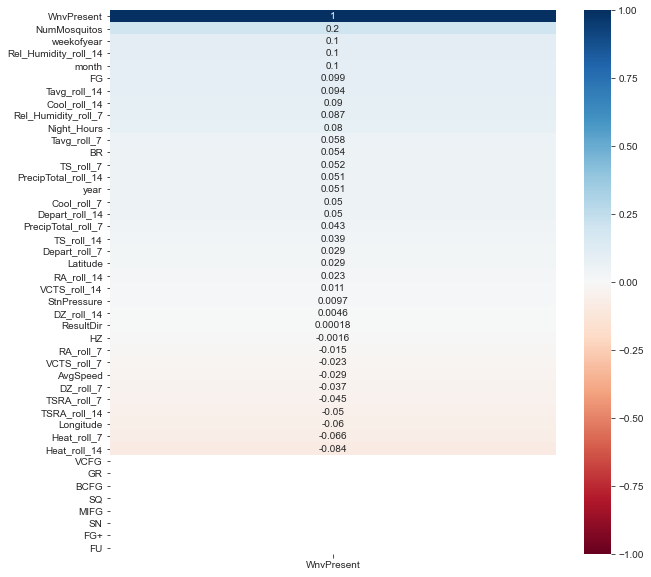

In [65]:
figure = plt.figure(figsize=(10,10))
sns.heatmap(train_weather.corr()[['WnvPresent']].sort_values('WnvPresent',ascending=False),annot=True, cmap='RdBu', center=0, vmin = -1,vmax = 1);

In [66]:
train_weather['SN'].describe()

count    10506.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: SN, dtype: float64

In [67]:
# Drop BCFG FG+ FU GR MIFG SN SQ VCFG weather events since they are not observed for the dates in the train dataset
train_weather.drop(['BCFG','FG+','FU','GR','MIFG','SN','SQ','VCFG'],axis=1,inplace=True)
test_weather.drop(['BCFG','FG+','FU','GR','MIFG','SN','SQ','VCFG'],axis=1,inplace=True)

#### Data Preparation

In [68]:
# Applying lowercase on column names in both datasets
train_weather.columns = train_weather.columns.map(lambda x: x.lower())
test_weather.columns = test_weather.columns.map(lambda x: x.lower())

In [69]:
# Making a copy of the train weather, before we apply final changes to the original train_weather
train_weather_copy = train_weather.copy()

In [70]:
# Making a copy of the train weather, before we apply final changes to the original test_weather
test_weather_copy = test_weather.copy()

In [71]:
# Dropping redundant columns in train set
train_weather_copy.drop(columns = ['date','year','latitude','longitude','resultdir','stnpressure','hz'],inplace = True)

In [72]:
# Dropping redundant columns in test set
test_weather_copy.drop(columns = ['date','year','address','block','street','addressnumberandstreet','addressaccuracy','latitude','longitude','resultdir','stnpressure','hz'],inplace = True)

In [73]:
# Aggregating all species with sample size, which do not have observed WNV in train set
train_weather_copy['species'] = train_weather_copy['species'].map(lambda x: 'OTHER SPECIES' if x in ['CULEX SALINARIUS','CULEX ERRATICUS','CULEX TARSALIS','CULEX TERRITANS'] else x)

In [74]:
# Checking to see if relabelling is successful
train_weather_copy['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'OTHER SPECIES'], dtype=object)

In [75]:
# Aggregating all species with sample size, which do not have observed WNV in test set
test_weather_copy['species'] = test_weather_copy['species'].map(lambda x: 'OTHER SPECIES' 
                                                                if x not in ['CULEX PIPIENS/RESTUANS','CULEX RESTUANS',
                                                                            'CULEX PIPIENS'] else x)

In [76]:
# Checking to see if relabelling is successful
test_weather_copy['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'OTHER SPECIES'], dtype=object)

In [77]:
train_weather.columns

Index(['date', 'species', 'trap', 'latitude', 'longitude', 'nummosquitos',
       'wnvpresent', 'stnpressure', 'resultdir', 'avgspeed', 'night_hours',
       'fg', 'hz', 'br', 'year', 'month', 'weekofyear', 'tavg_roll_7',
       'tavg_roll_14', 'depart_roll_7', 'depart_roll_14', 'heat_roll_7',
       'heat_roll_14', 'cool_roll_7', 'cool_roll_14', 'preciptotal_roll_7',
       'preciptotal_roll_14', 'rel_humidity_roll_7', 'rel_humidity_roll_14',
       'dz_roll_7', 'dz_roll_14', 'ra_roll_7', 'ra_roll_14', 'tsra_roll_7',
       'tsra_roll_14', 'ts_roll_7', 'ts_roll_14', 'vcts_roll_7',
       'vcts_roll_14'],
      dtype='object')

In [78]:
# Convert month and week variables into string datatype
train_weather_copy['month'] = train_weather_copy['month'].apply(str)
test_weather_copy['month'] = test_weather_copy['month'].apply(str)
train_weather_copy['weekofyear'] = train_weather_copy['weekofyear'].apply(str)
test_weather_copy['weekofyear'] = test_weather_copy['weekofyear'].apply(str)

In [79]:
# Grouping traps according to the number of wnvpresent
trap_wnv = train_weather_copy[['trap','wnvpresent','nummosquitos']].groupby('trap').sum().sort_values('wnvpresent', ascending = False)
trap_wnv.reset_index(inplace = True)

# Visualzing the top 5 traps with highest ratio of wnvpresent 
trap_wnv.head()

,trap,wnvpresent,nummosquitos
0,T900,66,15386
1,T115,41,21668
2,T002,18,3710
3,T138,16,9936
4,T003,14,1346


In [80]:
# List of traps that did not catch any WNV
no_wnv = []
for i in range(len(trap_wnv)):
    if trap_wnv['wnvpresent'][i] == 0:
        no_wnv.append(trap_wnv['trap'][i])

In [81]:
# Relabelling of traps that did not catch any WNV as NO WNV in train set
train_weather_copy['trap'] = train_weather_copy['trap'].map(lambda x: 'NO WNV' if x in no_wnv else x)

In [82]:
# To detect for areas most vulnerable to WNV
# Areas that are most susceptible to WNV include T900,T115,T138,T002...
train_weather_copy['trap'].value_counts()[:5]

NO WNV    1016
T900       750
T115       542
T138       314
T002       185
Name: trap, dtype: int64

In [83]:
# Relabelling of traps that did not catch any WNV or extra traps as NO WNV in test set
test_weather_copy['trap'] = test_weather_copy['trap'].map(lambda x:'NO WNV' if (x in no_wnv) | (x not in train_weather_copy['trap'].unique()) else x)

In [84]:
test_weather_copy['trap'].value_counts()

NO WNV    39551
T009       1528
T035       1520
T900       1468
T002        857
          ...  
T015        760
T037        760
T232        760
T084        760
T097        760
Name: trap, Length: 98, dtype: int64

In [85]:
# Double checking for extra traps present in test but not in train
[i for i in train_weather_copy['trap'].unique() if i not in test_weather_copy['trap'].unique()]

[]

In [86]:
# Dropping the target wnvpresent and nummosquitos(absent in test) from train set before merging
train_weather_copy.drop(columns = ['nummosquitos','wnvpresent'],inplace = True)

In [87]:
# Merging train and test set(not inclusive of test's ID column)
dataset  = pd.concat(objs=[train_weather_copy, test_weather_copy.loc[:,'species':]], axis=0)

In [136]:
# Making dummy variables for the merged dataset
dataset_dm = pd.get_dummies(data = dataset)

In [137]:
# Saving our final combined dataset! 
dataset_dm.to_csv('./data/final_dataset.csv',index = False)

## Pre-processing

In [90]:
# Libraries 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
#from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import xgboost as xgb
from xgboost import XGBClassifier

In [91]:
# Viewing first 5 rows of merged dataset
dataset_dm.head()

,avgspeed,night_hours,fg,br,tavg_roll_7,tavg_roll_14,depart_roll_7,depart_roll_14,heat_roll_7,heat_roll_14,cool_roll_7,cool_roll_14,preciptotal_roll_7,preciptotal_roll_14,rel_humidity_roll_7,rel_humidity_roll_14,dz_roll_7,dz_roll_14,ra_roll_7,ra_roll_14,tsra_roll_7,tsra_roll_14,ts_roll_7,ts_roll_14,vcts_roll_7,vcts_roll_14,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_OTHER SPECIES,trap_NO WNV,trap_T002,trap_T003,trap_T005,trap_T006,trap_T008,trap_T009,trap_T011,trap_T012,trap_T013,trap_T014,trap_T015,trap_T016,trap_T027,trap_T028,trap_T030,trap_T031,trap_T033,trap_T035,trap_T036,trap_T037,trap_T039,trap_T045,trap_T047,trap_T048,trap_T049,trap_T054,trap_T054C,trap_T061,trap_T062,trap_T063,trap_T065,trap_T066,trap_T067,trap_T069,trap_T070,trap_T073,trap_T074,trap_T077,trap_T079,trap_T080,trap_T081,trap_T082,trap_T083,trap_T084,trap_T085,trap_T086,trap_T089,trap_T090,trap_T091,trap_T094,trap_T095,trap_T096,trap_T097,trap_T102,trap_T103,trap_T107,trap_T114,trap_T115,trap_T128,trap_T135,trap_T138,trap_T142,trap_T143,trap_T144,trap_T145,trap_T147,trap_T151,trap_T152,trap_T154,trap_T155,trap_T156,trap_T158,trap_T159,trap_T160,trap_T162,trap_T200,trap_T209,trap_T212,trap_T215,trap_T218,trap_T220,trap_T221,trap_T222,trap_T223,trap_T224,trap_T225,trap_T226,trap_T227,trap_T228,trap_T230,trap_T231,trap_T232,trap_T233,trap_T235,trap_T236,trap_T900,trap_T903,month_10,month_5,month_6,month_7,month_8,month_9,weekofyear_22,weekofyear_23,weekofyear_24,weekofyear_25,weekofyear_26,weekofyear_27,weekofyear_28,weekofyear_29,weekofyear_30,weekofyear_31,weekofyear_32,weekofyear_33,weekofyear_34,weekofyear_35,weekofyear_36,weekofyear_37,weekofyear_38,weekofyear_39,weekofyear_40,weekofyear_41
0,6.95,9.066667,0.0,1.0,68.5,64.428571,5.714286,2.928571,1.285714,3.571429,5.0,3.25,0.116429,0.072143,55.266039,51.656646,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6.95,9.066667,0.0,1.0,68.5,64.428571,5.714286,2.928571,1.285714,3.571429,5.0,3.25,0.116429,0.072143,55.266039,51.656646,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6.95,9.066667,0.0,1.0,68.5,64.428571,5.714286,2.928571,1.285714,3.571429,5.0,3.25,0.116429,0.072143,55.266039,51.656646,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.95,9.066667,0.0,1.0,68.5,64.428571,5.714286,2.928571,1.285714,3.571429,5.0,3.25,0.116429,0.072143,55.266039,51.656646,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6.95,9.066667,0.0,1.0,68.5,64.428571,5.714286,2.928571,1.285714,3.571429,5.0,3.25,0.116429,0.072143,55.266039,51.656646,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
# Splitting dataset_dm back into train and test set
X = dataset_dm[:train_weather_copy.shape[0]]

In [93]:
# Target variable
y = train_weather['wnvpresent']

In [94]:
# dummified test set
final_test = dataset_dm[train_weather_copy.shape[0]:]

In [95]:
final_test.shape

(116293, 154)

In [96]:
# Splitting into train, validation datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,stratify = y, test_size = 0.2)

In [97]:
# Instantiating,fit and transform standard scaler
ss=  StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

## Modelling

### Model Selection Approach

We will use the ROC-AUC (Receiver Operating Characteristics - Area Under Curve) metric which tells how much a model is capable of distinguishing between classes, in our case detecting whether there is WNV presence in the mosquito traps at given location and time. 

We will be evaluating between different classification models which include Logistic Regression, K-Nearest Neighbors, Decision Tree, Bagging, Random Forest, Extra Trees, Gradient Boosting, Ada Boost and XG Boost. 

To address the class imbalance where the positive WNV class only make up about 5% of the dataset, we will be using the Synthetic Minority Oversampling Technique (SMOTE) to oversample our minority class. The advantage of this technique is that it reduces chance of overfitting because it generates new synthetic examples from the minority class which are relatively close in feature space to existing examples from the minority class, instead of simply replicating the minority class. The class ratio will also be stratified when splitting the training and testing set to reduce potential sampling bias.

The different models are passed into a cross validation pipeline to do a gridsearch on the best hyperparameters to optimise the AUC scores. 

### Modelling pipeline

In [98]:
# Models to train
model_dict = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'dt': DecisionTreeClassifier(),
    'bag':BaggingClassifier(),
    'rf':RandomForestClassifier(),
    'et': ExtraTreesClassifier(),
    'abc':AdaBoostClassifier(),
    'gbc':GradientBoostingClassifier(),
    'xgb': xgb.XGBClassifier(),
}

In [99]:
# For ease of viewing results later on
model_name = {
    'lr':'Logistic Regression',
    'knn':'KNeighborsClassifier',
    'dt': 'DecisionTree',
    'bag':'BaggingClassifier',
    'rf':'Random Forest',
    'et': 'ExtraTrees Classifier',
    'abc':'AdaBoost Classifier',
    'gbc':'GradientBoost Classifier',
    'xgb': 'XGBoost Classifier',
}

In [100]:
# pipelines, choosing hyperparameters and gridsearching
def pipeline(model):
    pipe = Pipeline([('over', SMOTE(random_state=42)), (model, model_dict[model])])
    return pipe

def params(model):
    if model == 'lr':
        return {'lr__penalty':['l1','l2','enet'],
               'lr__C':np.linspace(0.01,10,10)}
    elif model == 'knn':
        return {
            'knn__n_neighbors':[4,5,6,7]}

    elif model == 'dt':
        return {
            'dt__max_depth':[3,4,5],
            'dt__min_samples_split':[2,3,4],
            'dt__min_samples_leaf':[2,3,4]
        }
    elif model == 'bag':
        return {
            'bag__max_features':[100, 150]
        }
        
    elif model == 'rf':
        return {
            'rf__n_estimators':[100,150],
            'rf__max_depth':[4],
            'rf__min_samples_leaf':[2,3,4]
        }
    elif model == 'et':
        return {
            'et__n_estimators':[50,100,150],
            'et__max_depth':[5],
            'et__min_samples_leaf':[2,3],
        }
    elif model == 'abc':
        return {
            'abc__n_estimators':[50, 100,150],
            'abc__learning_rate':[0.3,0.6,1]
        }
    elif model == 'gbc':
        return {
            'gbc__learning_rate':[0.2],
            'gbc__max_depth':[5],
            'gbc__min_samples_split':[2,5]
            
        }
    elif model == 'xgb':
        return {
            'xgb__eval_metric' : ['auc'],
            'xgb__subsample' : [0.8], 
            'xgb__colsample_bytree' : [0.5], 
            'xgb__learning_rate' : [0.1],
            'xgb__max_depth' : [5], 
            'xgb__scale_pos_weight': [5], 
            'xgb__n_estimators' : [100,200],
            'xgb__reg_alpha' : [0, 0.05],
            'xgb__reg_lambda' : [2,3],
            'xgb__gamma' : [0.01]
                             
        }
    
 
    
def grid_search(model,X_train = X_train_ss,y_train = y_train,X_test = X_test_ss,y_test=y_test):
    pipe_params = params(model)
    pipe = pipeline(model)
    gs = GridSearchCV(pipe,param_grid = pipe_params,cv = 5,scoring = 'roc_auc', verbose=True, n_jobs=8)
    gs.fit(X_train_ss,y_train)
    grid_search.train_score = gs.score(X_train_ss,y_train)
    grid_search.test_score = gs.score(X_test_ss,y_test)
    
    print(f'Results from: {model_name[model]}')
    print(f'-----------------------------------')
    print(f'Best Hyperparameters: {gs.best_params_}')
    print(f'Mean ROC AUC Score: {round(gs.best_score_,4)}')
    print(f'Train Score: {round(grid_search.train_score,4)}')
    print(f'Test Score: {round(grid_search.test_score,4)}')
    print(' ')

    print("recall score:", round(recall_score(y_test, gs.best_estimator_.predict(X_test)),4))  
    print("precision score:", round(precision_score(y_test, gs.best_estimator_.predict(X_test)),4))
    print("f1 score:", round(f1_score(y_test, gs.best_estimator_.predict(X_test)),4))
    
    
    cm = confusion_matrix(y_test, gs.best_estimator_.predict(X_test))
    cm_df = pd.DataFrame(data = cm, columns = ['predict_wnv_negative','predict_wnv_positive'], index =['actual_wnv_negative','actual_wnv_positive'])
    return cm_df
    

## Modelling

#### Logistic Regression

In [101]:
#1) Starting with Logistic
grid_search('lr')

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    8.2s finished


Results from: Logistic Regression
-----------------------------------
Best Hyperparameters: {'lr__C': 0.01, 'lr__penalty': 'l2'}
Mean ROC AUC Score: 0.8133
Train Score: 0.8753
Test Score: 0.8094
 
recall score: 0.6636
precision score: 0.142
f1 score: 0.234


,predict_wnv_negative,predict_wnv_positive
actual_wnv_negative,1551,441
actual_wnv_positive,37,73


In [102]:
# Analyzing importance of different features
lr = LogisticRegression(penalty = 'l2',
                       C = 0.01)
lr.fit(X_train_ss,y_train)
coef_dict = {}
for coef,feature in zip(lr.coef_.ravel(),X_train.columns):
    coef_dict[feature] = coef

In [103]:
sorted_coef_dict = {
    k:v for k,v in sorted(coef_dict.items(),key = lambda x: abs(x[1]),reverse=True)}

In [104]:
# Top 10 features that have strongest influence on predictions
{k:v for (k,v) in [x for x in sorted_coef_dict.items()][:10]}

{'trap_NO WNV': -0.4023145283831195,
 'month_8': 0.2538624849967579,
 'trap_T900': 0.23284288640813758,
 'weekofyear_34': 0.22553907560183914,
 'weekofyear_36': 0.22332028025751946,
 'tsra_roll_7': -0.21123376561164667,
 'month_6': -0.1976031454207048,
 'species_OTHER SPECIES': -0.19130791451031817,
 'species_CULEX RESTUANS': -0.1892175902374158,
 'fg': 0.17978859653034604}

Text(0.5, 1.0, 'Coefficients against features')

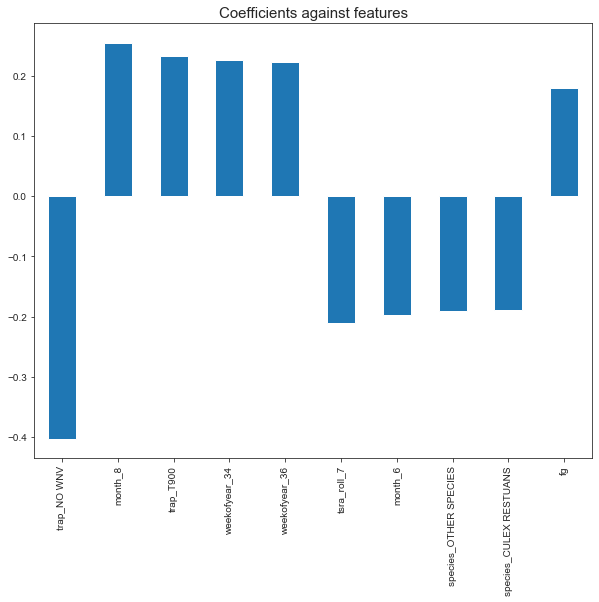

In [105]:
features = [feat for feat in sorted_coef_dict.keys()]
coefs = [coef for coef in sorted_coef_dict.values()]
plt.figure(figsize = (10,8))
pd.Series(coefs[:10],index = features[:10]).plot.bar()
plt.title('Coefficients against features',fontsize = 15)

#### K-Nearest Neighbours

In [106]:
# 2) KNN model
grid_search('knn')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    9.9s finished


Results from: KNeighborsClassifier
-----------------------------------
Best Hyperparameters: {'knn__n_neighbors': 7}
Mean ROC AUC Score: 0.6918
Train Score: 0.9458
Test Score: 0.7109
 
recall score: 0.5273
precision score: 0.1315
f1 score: 0.2105


,predict_wnv_negative,predict_wnv_positive
actual_wnv_negative,1609,383
actual_wnv_positive,52,58


#### Decision Tree

In [107]:
# Decision tree model
grid_search('dt')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 135 out of 135 | elapsed:    3.9s finished


Results from: DecisionTree
-----------------------------------
Best Hyperparameters: {'dt__max_depth': 5, 'dt__min_samples_leaf': 3, 'dt__min_samples_split': 2}
Mean ROC AUC Score: 0.7835
Train Score: 0.81
Test Score: 0.7739
 
recall score: 0.4909
precision score: 0.1414
f1 score: 0.2195


,predict_wnv_negative,predict_wnv_positive
actual_wnv_negative,1664,328
actual_wnv_positive,56,54


#### Bagging

In [108]:
# Bagging classifier
grid_search('bag')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    1.8s remaining:    1.2s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    2.6s finished


Results from: BaggingClassifier
-----------------------------------
Best Hyperparameters: {'bag__max_features': 100}
Mean ROC AUC Score: 0.81
Train Score: 0.9754
Test Score: 0.7896
 
recall score: 0.1364
precision score: 0.2083
f1 score: 0.1648


,predict_wnv_negative,predict_wnv_positive
actual_wnv_negative,1935,57
actual_wnv_positive,95,15


#### Random Forest

In [109]:
grid_search('rf')

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    5.2s finished


Results from: Random Forest
-----------------------------------
Best Hyperparameters: {'rf__max_depth': 4, 'rf__min_samples_leaf': 3, 'rf__n_estimators': 100}
Mean ROC AUC Score: 0.8284
Train Score: 0.8382
Test Score: 0.793
 
recall score: 0.6818
precision score: 0.133
f1 score: 0.2226


,predict_wnv_negative,predict_wnv_positive
actual_wnv_negative,1503,489
actual_wnv_positive,35,75


#### Extra Trees

In [110]:
grid_search('et')

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    6.0s finished


Results from: ExtraTrees Classifier
-----------------------------------
Best Hyperparameters: {'et__max_depth': 5, 'et__min_samples_leaf': 2, 'et__n_estimators': 100}
Mean ROC AUC Score: 0.829
Train Score: 0.8428
Test Score: 0.7933
 
recall score: 0.7273
precision score: 0.1244
f1 score: 0.2125


,predict_wnv_negative,predict_wnv_positive
actual_wnv_negative,1429,563
actual_wnv_positive,30,80


#### Ada Boost

In [111]:
grid_search('abc')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  45 out of  45 | elapsed:   43.0s finished


Results from: AdaBoost Classifier
-----------------------------------
Best Hyperparameters: {'abc__learning_rate': 0.3, 'abc__n_estimators': 150}
Mean ROC AUC Score: 0.841
Train Score: 0.8549
Test Score: 0.8269
 
recall score: 0.3455
precision score: 0.181
f1 score: 0.2375


,predict_wnv_negative,predict_wnv_positive
actual_wnv_negative,1820,172
actual_wnv_positive,72,38


#### Gradient Boosted Tree

In [112]:
grid_search('gbc')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:   18.8s remaining:   12.5s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   27.5s finished


Results from: GradientBoost Classifier
-----------------------------------
Best Hyperparameters: {'gbc__learning_rate': 0.2, 'gbc__max_depth': 5, 'gbc__min_samples_split': 5}
Mean ROC AUC Score: 0.8399
Train Score: 0.9454
Test Score: 0.8297
 
recall score: 0.1364
precision score: 0.2239
f1 score: 0.1695


,predict_wnv_negative,predict_wnv_positive
actual_wnv_negative,1940,52
actual_wnv_positive,95,15


#### XG Boost

In [113]:
grid_search('xgb')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:   30.5s finished


Results from: XGBoost Classifier
-----------------------------------
Best Hyperparameters: {'xgb__colsample_bytree': 0.5, 'xgb__eval_metric': 'auc', 'xgb__gamma': 0.01, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 200, 'xgb__reg_alpha': 0, 'xgb__reg_lambda': 3, 'xgb__scale_pos_weight': 5, 'xgb__subsample': 0.8}
Mean ROC AUC Score: 0.8466
Train Score: 0.9233
Test Score: 0.8352
 
recall score: 0.4455
precision score: 0.1892
f1 score: 0.2656


,predict_wnv_negative,predict_wnv_positive
actual_wnv_negative,1782,210
actual_wnv_positive,61,49


### Model Evaluation

The results for the different classifiers are summarised in the table below. The cross validation AUC scores range from 0.692 to 0.847 for the different models with the XG Boost classifier outperforming the rest. However, the XG Boost has a high degree of overfitting with a variance of about 9% between the train and test scores, hence may not generalize well to unseen data.  

Between models with low variance between train and test scores of about 3-5%, we chose the Extra Trees classifier with a cross validation AUC score of 0.827, as it is able to achieve a high recall of 0.745 on the test data, at the expense of slightly lower precision (higher false positives). We have chosen to prioritise recall over precision to err on the side of caution as we felt the cost to public health is actually higher than cost of intervention efforts, as there could be a risk of WNV epidemic if proper control is not done. 

|Models |CV Score |Train Score |Test Score |Recall   |Precision|F1
|---	|---	  |---	       |---	            |---	    |---      |---
|Logistic Regression 	|0.813 |0.875          	|0.809   	|0.664   	|0.142     |0.234
|K-Nearest Neighbors   	|0.692 |0.946   	    |0.711   	|0.527   	|0.132     |0.211 
|Decision Tree          |0.784 |0.810   	    |0.774   	|0.491   	|0.141     |0.219
|Bagging 	            |0.805 |0.972          	|0.813   	|0.154   	|0.230     |0.185
|Random Forest 	        |0.826 |0.839          	|0.797   	|0.664   	|0.142     |0.234
|Extra Trees   	        |0.827 |0.841   	    |0.794   	|0.745   	|0.123     |0.211
|Gradient Boosting Tree |0.838 |0.945 	        |0.830   	|0.136   	|0.224     |0.169
|Ada Boost 	            |0.841 |0.855          	|0.827   	|0.345   	|0.181     |0.237
|XG Boost 	            |0.847 |0.923          	|0.835   	|0.445   	|0.189     |0.266

### Production Model Performance

In [114]:
# Upsample training data

sm = SMOTE(random_state=42)
X_train_ss_upsample, y_train_upsample = sm.fit_resample(X_train_ss, y_train)

# Instantiate Extra Trees model with best hyperparameters
et = ExtraTreesClassifier(max_depth = 5, min_samples_leaf = 3, n_estimators = 150)

# Fit model
et.fit(X_train_ss_upsample, y_train_upsample)

ExtraTreesClassifier(max_depth=5, min_samples_leaf=3, n_estimators=150)

In [115]:
# Generate dataframe on actual values versus predicted probabilities on test data
pred_proba = [i[1] for i in et.predict_proba(X_test_ss)]
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})
pred_df.head()

,true_values,pred_probs
539,0,0.320367
7321,0,0.659059
7652,0,0.415191
5509,1,0.549192
7574,0,0.505971


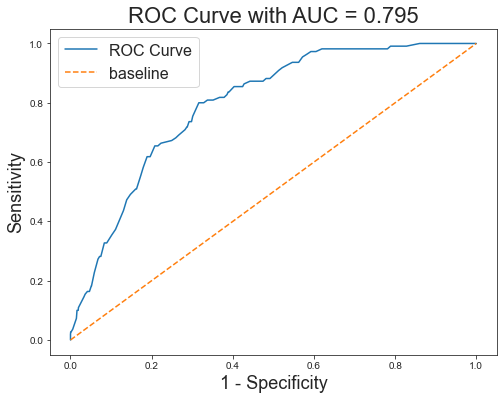

In [116]:
# Create figure for AUC ROC graph
plt.figure(figsize = (8,6))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

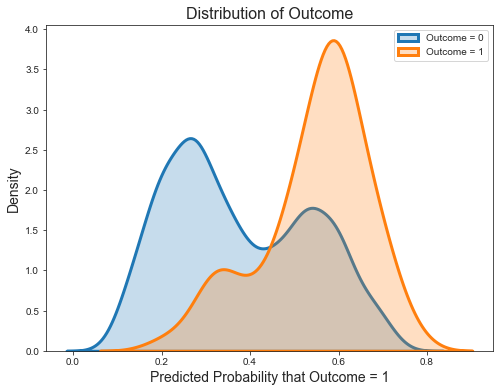

In [117]:
plt.figure(figsize = (8,6))

# Draw the density plot
sns.distplot(pred_df[pred_df['true_values'] == 0]['pred_probs'], hist = False, kde = True,
                 kde_kws = {'shade': True,'linewidth': 3},
                 label = 'Outcome = 0')
sns.distplot(pred_df[pred_df['true_values'] == 1]['pred_probs'], hist = False, kde = True,
                 kde_kws = {'shade': True,'linewidth': 3},
                 label = 'Outcome = 1')
# Plot formatting
plt.title('Distribution of Outcome', size=16)
plt.ylabel('Density', size=14)
plt.xlabel('Predicted Probability that Outcome = 1', size=14)
plt.legend(loc = 'upper right')

#### Feature Importance

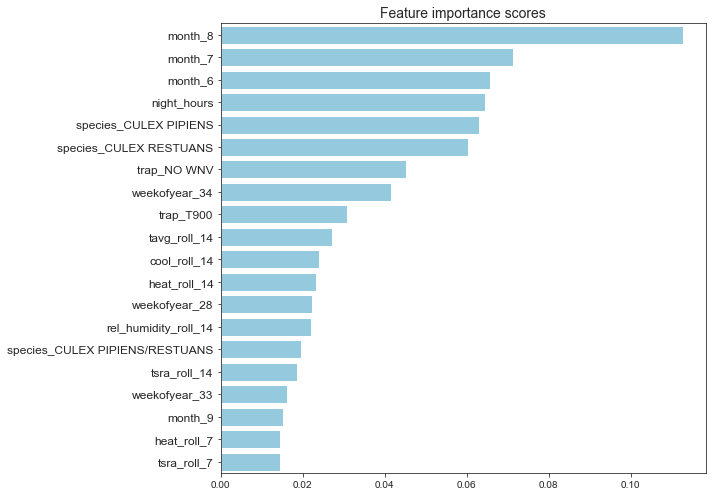

In [118]:
# Plot feature importance barchart
feature_impt = et.feature_importances_

features = X_test.columns

feature_impt_df = pd.DataFrame(columns=['feature', 'importance'], data=list(zip(features, feature_impt))).sort_values('importance',ascending=False).head(20)

plt.figure(figsize = (10, 7))
sns.barplot(data = feature_impt_df, x = 'importance', y = 'feature', color = 'skyblue')
plt.title('Feature importance scores', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize = 12)
plt.tight_layout()

From the feature importance scores, it can be seen that the months of the year, duration of night hours, mosquito species (Culex Restuans and Culex Pipiens) and location (traps without WNV presence and T900 at Ohare Airport) are the top features in predicting the presence of WNV in the traps, with month of August feature having the highest importance score.

Weather features in the next tier such as 14-day rolling average temperature, thunderstorm/ rain and humidity also carries an importance in predicting the presence of WNV as mosquitoes tend to thrive under such conditions evidenced in our EDA findings. 

## Conclusion and Recommendation

## Kaggle Submission

In [119]:
# Apply standard scaler to whole training set
X_ss = ss.fit_transform(X)

In [120]:
# Apply upsampling of minority class to whole training set
sm = SMOTE(random_state=42)
X_upsample, y_upsample = sm.fit_resample(X_ss, y)

In [121]:
# Fit model
et.fit(X_upsample, y_upsample)

ExtraTreesClassifier(max_depth=5, min_samples_leaf=3, n_estimators=150)

In [122]:
# Transform standard scaler to kaggle test set
kaggle_test_ss = ss.transform(final_test)

In [123]:
# Extract prediction probabilities for positive class, i.e. Wnv Present
pred = [i[1] for i in et.predict_proba(kaggle_test_ss)]

In [124]:
# Create submission csv in proper format
test['WnvPresent'] = pred

export = pd.DataFrame({'Id': test.Id, 'WnvPresent': pred})
print(export.shape)
export.to_csv('./assets/kaggle_submissions_et_v7.csv', index =False)


(116293, 2)


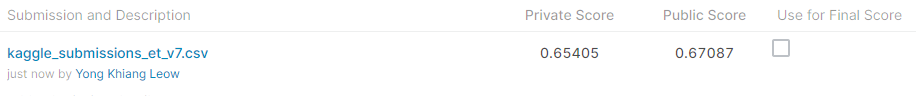

The Kaggle results are 0.654 (Private) and 0.671 (Public) for the AUC scores. 

In [ ]:
#final_test_copy['WnvPresent_pred'] =[np.random.choice([1,0], p=[final_test_copy.WnvPresent[i], 1-final_test_copy.WnvPresent[i]]) 
# for i in range(len(final_test_copy))]

In [126]:
final_test_copy = test.copy()
final_test_copy['WnvPresent'] = pred

In [127]:
final_test_copy.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'WnvPresent'],
      dtype='object')

In [128]:
final_test_copy['Year'] = final_test_copy['Date'].apply(lambda x:x.year)
final_test_copy['Month'] = final_test_copy['Date'].apply(lambda x:x.month)
final_test_copy['WeekofYear'] = final_test_copy['Date'].apply(lambda x:x.weekofyear)
final_test_copy['YearMonth'] = final_test_copy['Date'].apply(lambda x: '{}-{:02d}'.format(x.year, x.month))

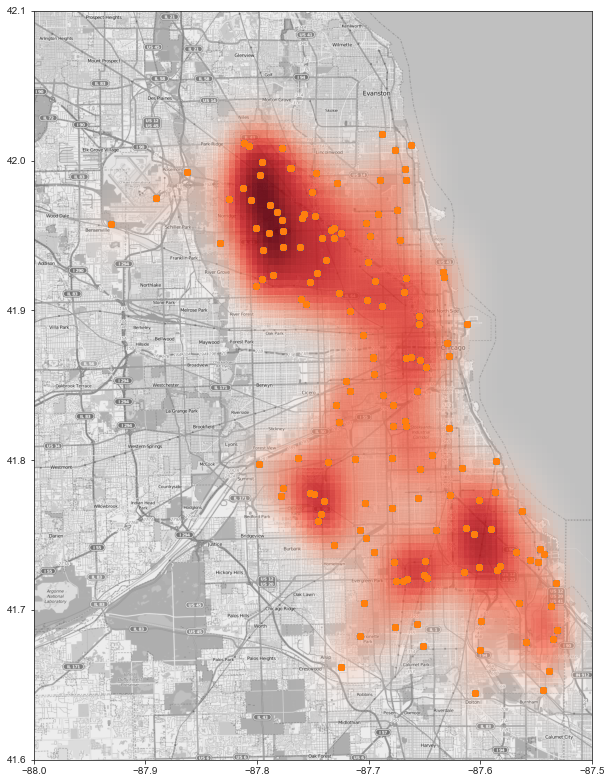

In [132]:
from sklearn.neighbors import KernelDensity
mapdata = np.loadtxt("./data/mapdata_copyright_openstreetmap_contributors.txt")
traps = final_test_copy[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)
# Only inclusive of areas where WnvPresent is 1(aka proba of wnvpresent > 0.5)
sigthings = traps[traps['WnvPresent'] > 0.5]
sigthings = sigthings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X = sigthings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.02)
kd.fit(X)
xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
plt.figure(figsize=(10,14))
plt.imshow(mapdata,
           cmap=plt.get_cmap('gray'),
           extent=lon_lat_box,
           aspect=aspect)
plt.imshow(zv,
           origin='lower',
           cmap=alpha_cm,
           extent=lon_lat_box,
           aspect=aspect)
locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.scatter(X[:,0], X[:,1], marker='o')
plt.savefig('./assets/heatmap.png')

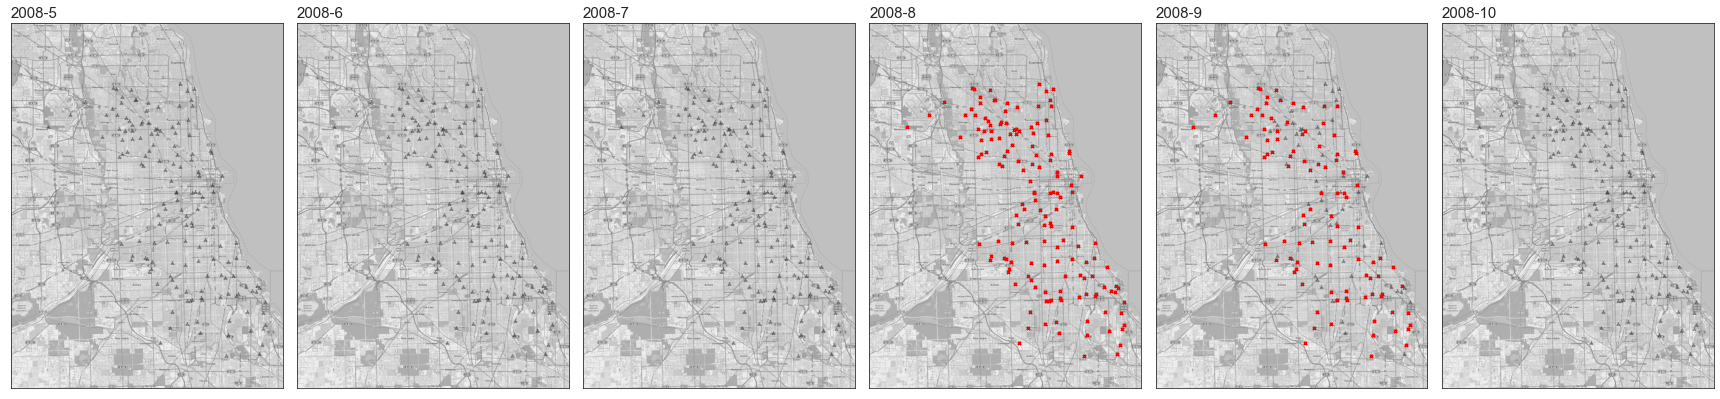

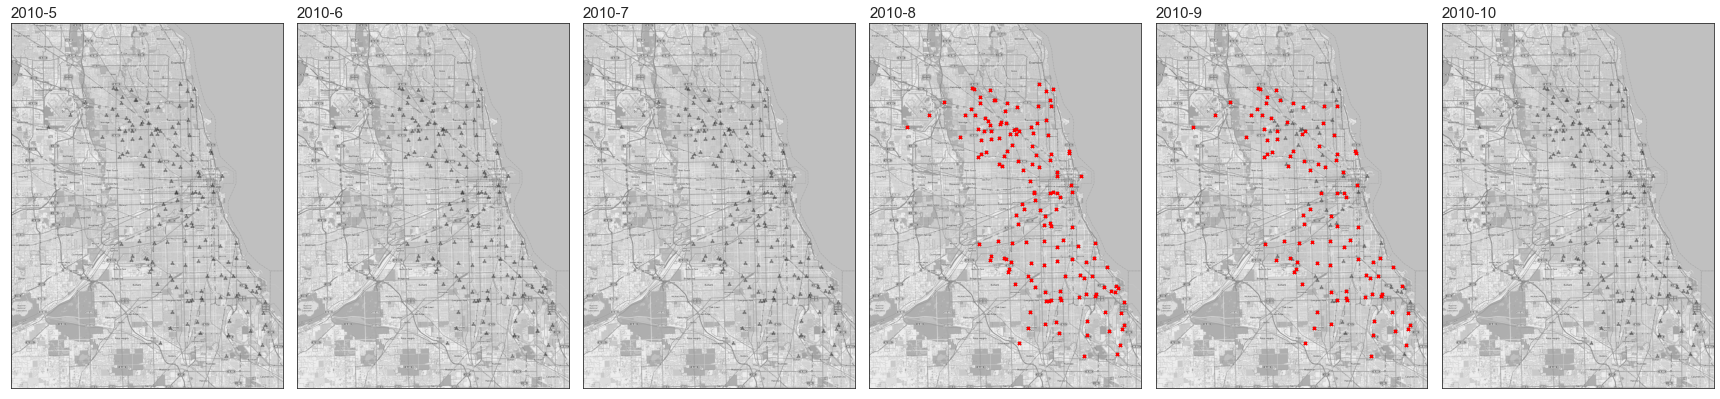

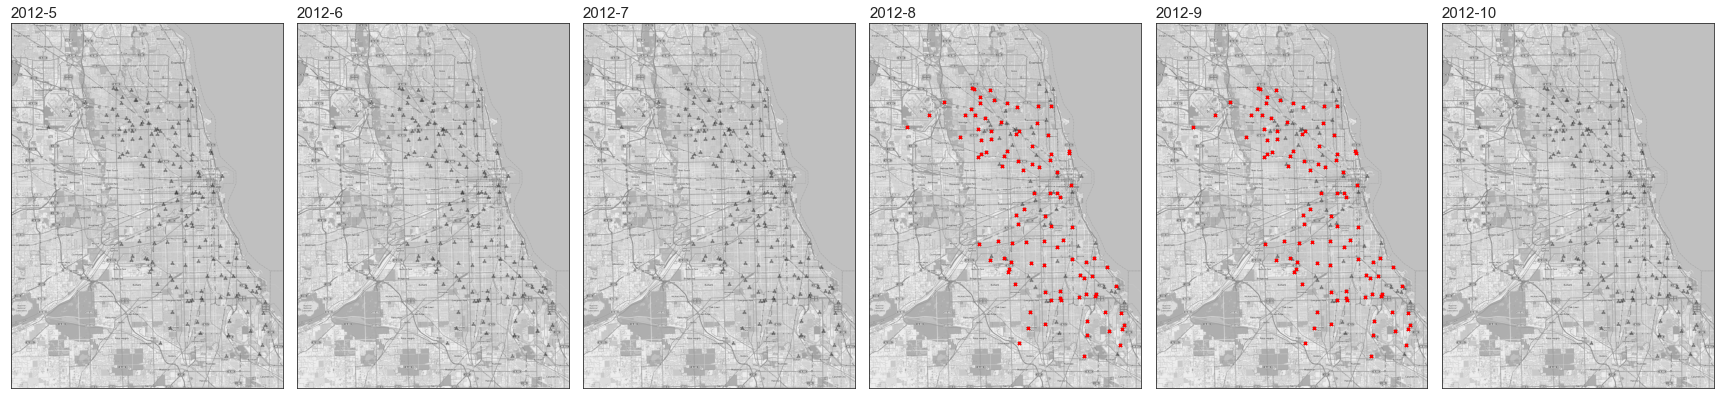

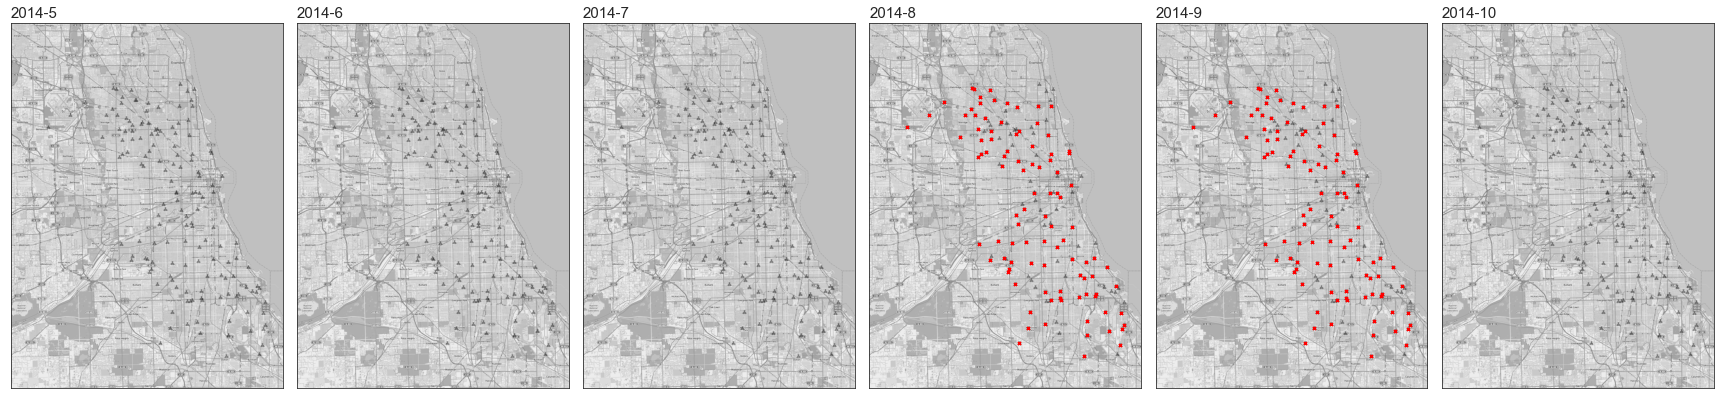

In [131]:
for year in final_test_copy.Year.unique():
    fig, ax = plt.subplots(ncols = 6, figsize = (24,12))
    
    for i, month in enumerate([5,6,7,8,9,10]):
        # plot basemap
        ax[i].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
        
        # plot trap locations
        locations = final_test_copy[['Longitude', 'Latitude']].drop_duplicates().values
        ax[i].scatter(locations[:,0], locations[:,1], marker='2', c = 'black', s=20, alpha = 0.4)
        
        # plot wnv locations for year and month
        wnv = final_test_copy[(final_test_copy.Year == year) & (final_test_copy.Month == month) 
                              & (final_test_copy.WnvPresent>0.5)]\
                [['Longitude', 'Latitude']].drop_duplicates().values
        ax[i].scatter(wnv[:,0], wnv[:,1], marker='x', c = 'red', s = 10)
        
        # title and axes
        ax[i].set_title(f"{year}-{month}", fontsize = 15, ha = 'left', position = (0,1))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        
        plt.tight_layout()
    plt.savefig(f'./assets/image{year}.jpg')